### Keras 모델 생성/학습 - MNIST : CNN
[Keras Dataset](https://keras.io/ko/datasets/#mnist)

In [1]:
# 1. 데이터 불러오기
from keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape , X_test.shape , y_test.shape )

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


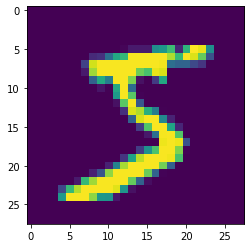

In [2]:
# 2. 이미지 데이터 확인하기 🖼
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [3]:
# 3-1. 이미지 데이터 전처리 : 2차원->3차원 🌟🌟🌟
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [4]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [5]:
# 3-2. 이미지 데이터 전처리 : Normalzation 
X_train = X_train/255
X_test = X_test/255

In [6]:
# 4. Label 전처리 (one-hot encoding) 
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [7]:
# 5. 모델 생성 : CNN 🌟🌟🌟
from tensorflow import keras
from tensorflow.keras import models, layers
from keras.layers import Dense, Activation, Dropout, Flatten
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils

model = models.Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))

In [16]:
model = keras.Sequential()

model.add(Conv2D(filters=128, #units 노드 필터 개수
                kernel_size=(3,3), #필터의 사이즈(홀수)
                padding = 'same', #이미지 사이즈 유지할것인가 'savalid'
                activation = 'relu',
                input_shape = (28,28,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        73792     
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               6423040   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [8]:
# 6. Compile - Optimizer, Loss function 설정
batch_size = 128
epochs = 100
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [9]:
# 7. 모델 학습시키기
history = model.fit(X_train, y_train, batch_size=32, epochs=1000, 
                    validation_split=0.2, verbose=2, callbacks=[early_stopping])

Epoch 1/1000
1500/1500 - 10s - loss: 0.2396 - accuracy: 0.9326 - val_loss: 0.1065 - val_accuracy: 0.9713
Epoch 2/1000
1500/1500 - 9s - loss: 0.0897 - accuracy: 0.9747 - val_loss: 0.0807 - val_accuracy: 0.9759
Epoch 3/1000
1500/1500 - 10s - loss: 0.0660 - accuracy: 0.9806 - val_loss: 0.0692 - val_accuracy: 0.9802
Epoch 4/1000
1500/1500 - 9s - loss: 0.0544 - accuracy: 0.9839 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch 5/1000
1500/1500 - 9s - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.0729 - val_accuracy: 0.9785
Epoch 6/1000
1500/1500 - 10s - loss: 0.0405 - accuracy: 0.9877 - val_loss: 0.0620 - val_accuracy: 0.9812
Epoch 7/1000
1500/1500 - 9s - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0656 - val_accuracy: 0.9808
Epoch 8/1000
1500/1500 - 9s - loss: 0.0297 - accuracy: 0.9912 - val_loss: 0.0609 - val_accuracy: 0.9829
Epoch 9/1000
1500/1500 - 11s - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0702 - val_accuracy: 0.9801
Epoch 10/1000
1500/1500 - 10s - loss: 0.0217 - accuracy: 0.9

In [10]:
# 8. 모델 평가하기
loss, acc = model.evaluate(X_test, y_test, batch_size=30)  # 학습 완료 후 검증
print("손실률:", loss)  
print("정확도:", acc)  

334/334 [==============================] - 1s 3ms/step - loss: 0.0640 - accuracy: 0.9819
손실률: 0.06396438926458359
정확도: 0.9818999767303467


In [11]:
history.history

{'loss': [0.23958098888397217,
  0.08967635035514832,
  0.0659695565700531,
  0.05440455675125122,
  0.04643012583255768,
  0.040454283356666565,
  0.03383028507232666,
  0.029693754389882088,
  0.025081578642129898,
  0.021694544702768326,
  0.018247738480567932,
  0.015507844276726246,
  0.013539373874664307],
 'accuracy': [0.932645857334137,
  0.9747083187103271,
  0.9805625081062317,
  0.9838749766349792,
  0.9859791398048401,
  0.9877291917800903,
  0.9896041750907898,
  0.9912083148956299,
  0.99197918176651,
  0.9930416941642761,
  0.9944999814033508,
  0.9953749775886536,
  0.9962499737739563],
 'val_loss': [0.10654935985803604,
  0.08071891963481903,
  0.06920620799064636,
  0.07450833916664124,
  0.07294605672359467,
  0.06204148009419441,
  0.06563510000705719,
  0.06093170493841171,
  0.07019656151533127,
  0.06347005069255829,
  0.06419537216424942,
  0.06948497146368027,
  0.07138641923666],
 'val_accuracy': [0.9713333249092102,
  0.9759166836738586,
  0.9801666736602783,

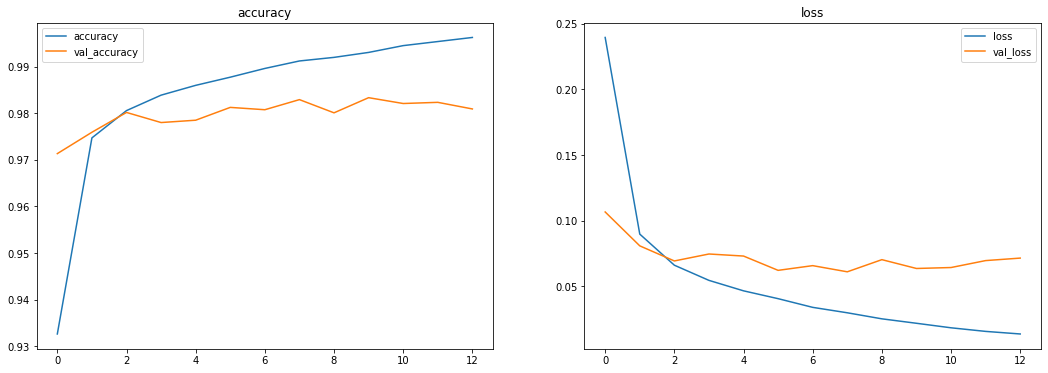

In [12]:
#  9. 학습 시각화하기
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="accuracy")
plt.plot(history.history['val_accuracy'], label="val_accuracy")

plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")

plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

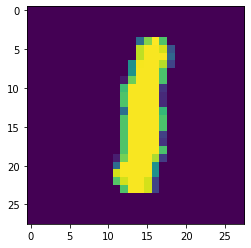

real: 1
predict: 1


In [13]:
#10. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼
import warnings
warnings.filterwarnings("ignore")

import random
from random import randint

rand_num = randint(0,10000)
plt.imshow(X_test[rand_num]) 
plt.show()

pred = model.predict_classes(X_test)[rand_num]  # 다중분류이므로, predict_classes

print("real:", y_test[rand_num].argmax())
print("predict:", pred) 

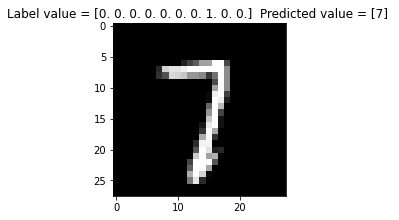

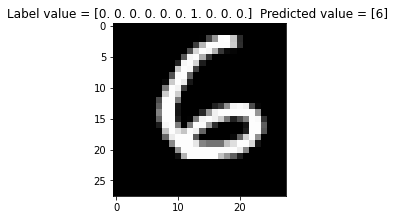

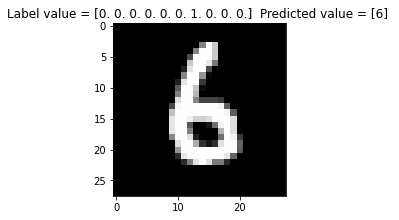

In [14]:
import numpy as np
for index in np.random.choice(len(y_test), 3, replace = False):
    test_image = X_test[index].reshape(1, 28, 28, 1)
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    title = "Label value = %s  Predicted value = %s " % (label, result_predicted[1])
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(28, 28), cmap = plt.cm.gray, interpolation = 'nearest')
    plt.show()